In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Non-Positional Encoding

There are four major cases to consider when we want to plot three variables together:

- three numeric variables
- two numeric variables and one categorical variable
- one numeric variable and two categorical variables
- three categorical variables

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e. where we have at least two categorical variables.)

Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

In [2]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')

sedan_classes = [f'{value} Cars' for value in ['Minicompact', 'Subcompact', 'Compact', 'Midsize', 'Large']]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.head(6)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


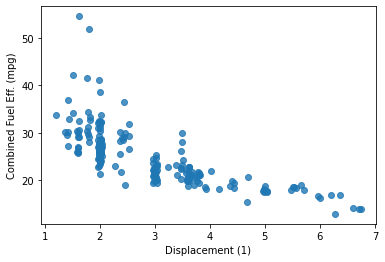

In [3]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

sb.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

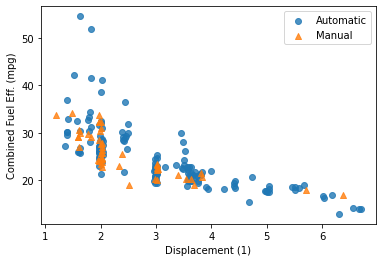

In [4]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

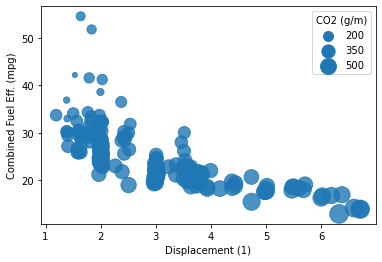

In [5]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb', 
           x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2'] / 2})
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = [plt.scatter([], [], s=s/2, color=base_color) for s in sizes]
plt.legend(legend_obj, sizes, title='CO2 (g/m)');

## Color Palettes

Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value: color for category in a clustered bar chart, and color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart). Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

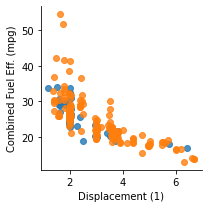

In [6]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type')
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

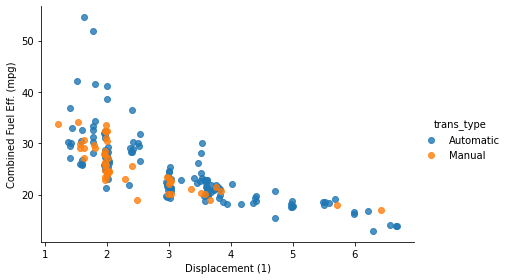

In [7]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type', 
                 hue_order=['Automatic', 'Manual'], height=4, aspect=1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

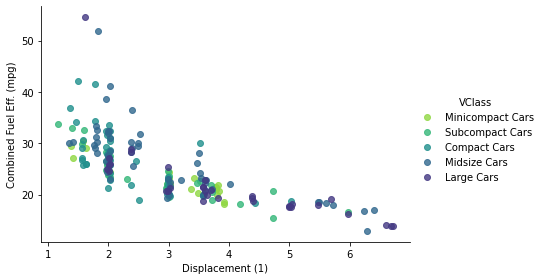

In [8]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='VClass', 
                 height=4, aspect=1.5, palette='viridis_r')
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

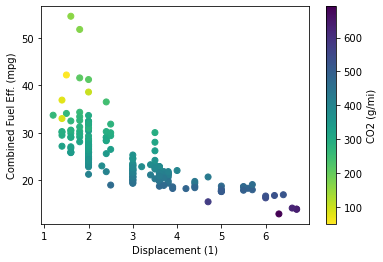

In [9]:
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2', cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Faceting for Multivariate Data

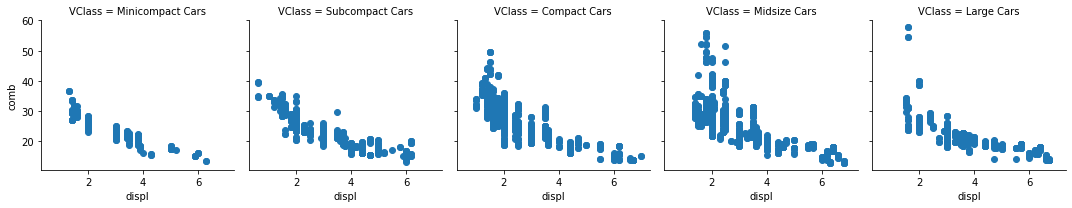

In [10]:
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter, 'displ', 'comb');

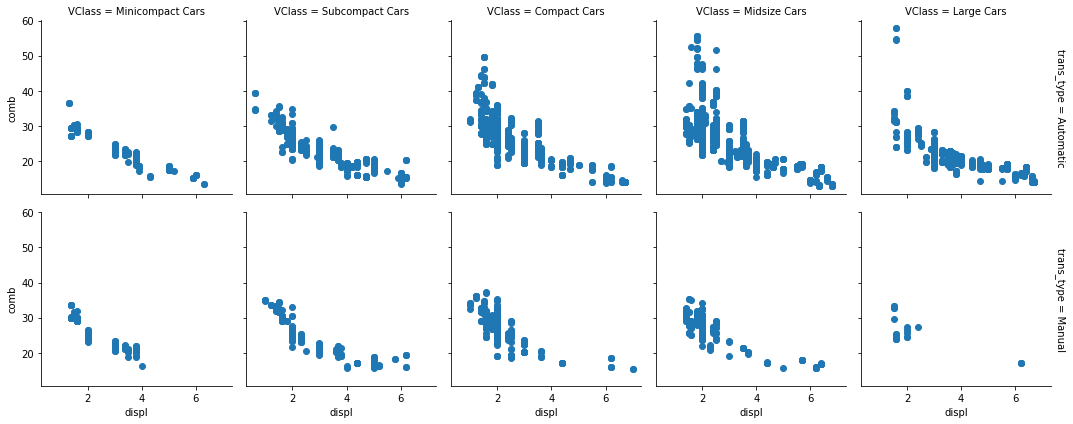

In [11]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb');

# Other Adaptations of Bivariate Plots

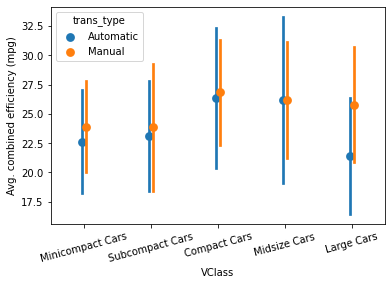

In [12]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type',
            ci='sd', linestyles='', dodge=True)
plt.xticks(rotation=15)
plt.ylabel('Avg. combined efficiency (mpg)');

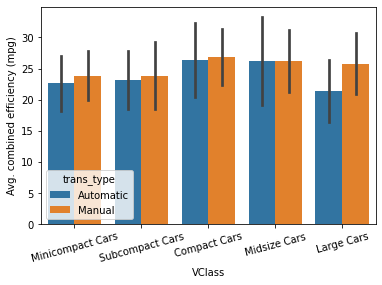

In [13]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type',
            ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. combined efficiency (mpg)');

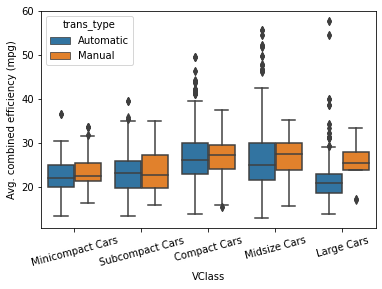

In [14]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. combined efficiency (mpg)');

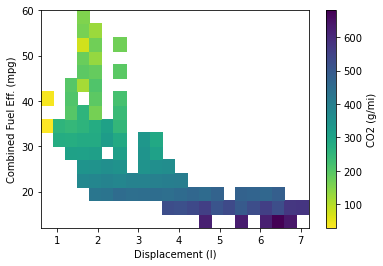

In [15]:
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)

displ_bins = pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right=False, include_lowest=False,
                   labels=False).astype(int)

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

# Plot Matrices

To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

In [16]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


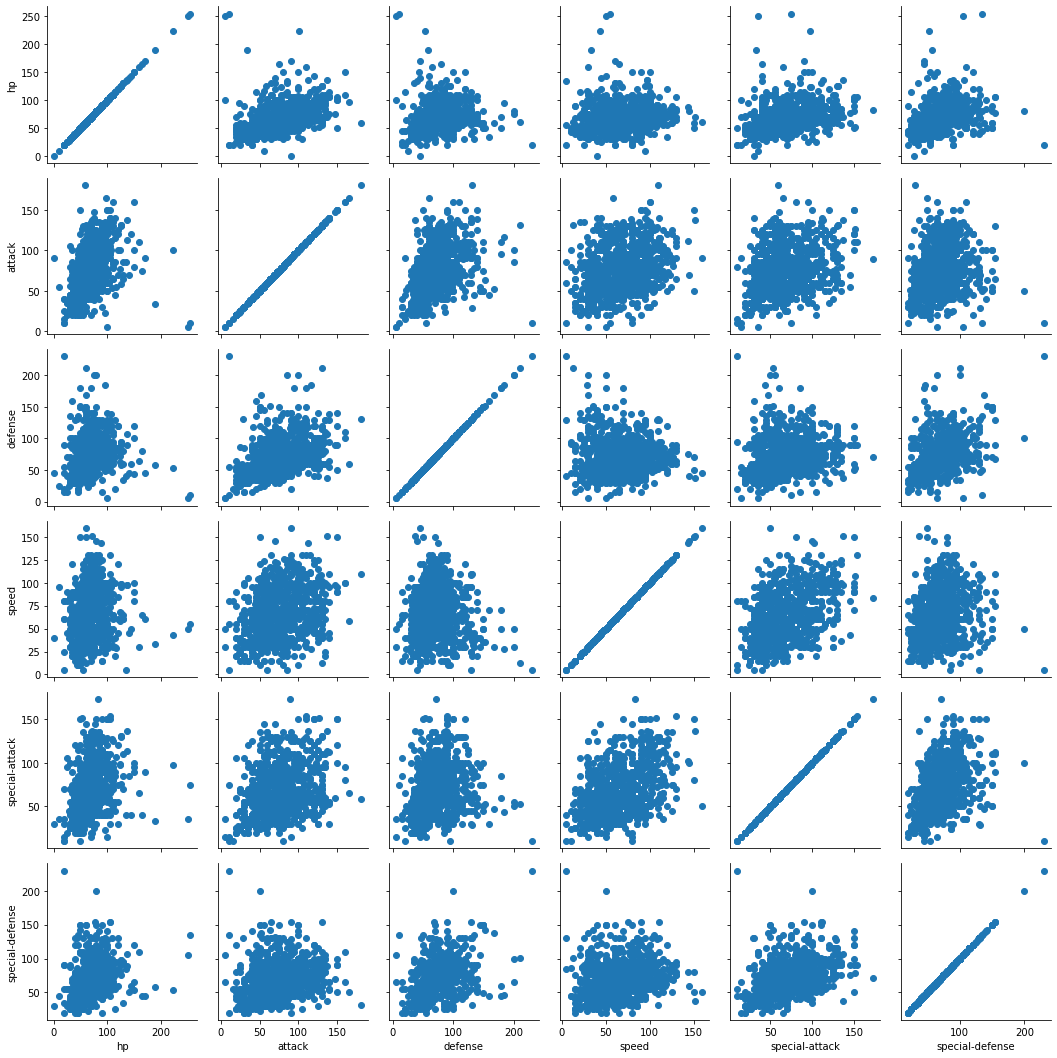

In [17]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data=pokemon, vars=pkmn_stats)
g.map(plt.scatter);

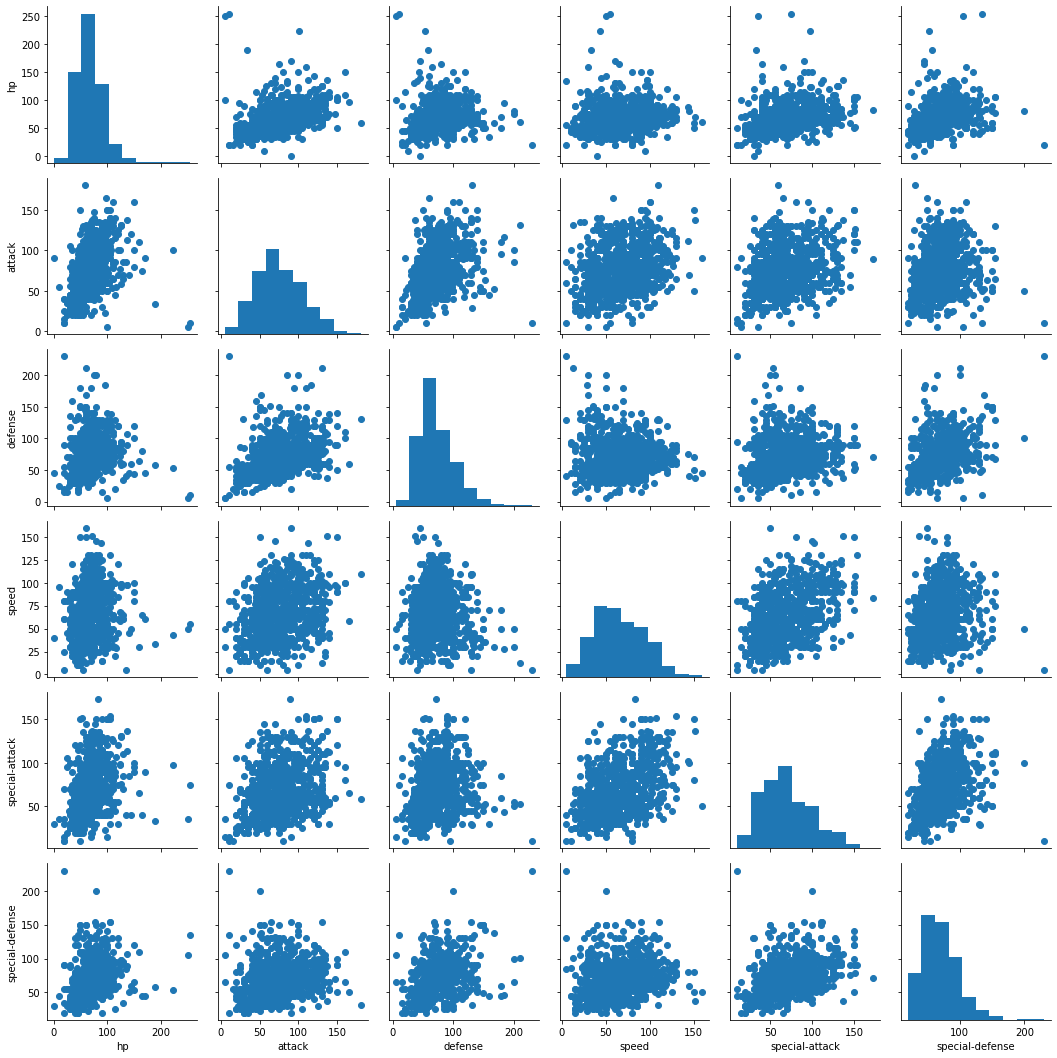

In [18]:
g = sb.PairGrid(data=pokemon, vars=pkmn_stats)
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

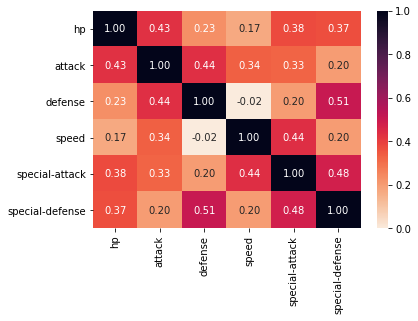

In [19]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True, fmt='.2f', vmin=0);

# Feature Engineering

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

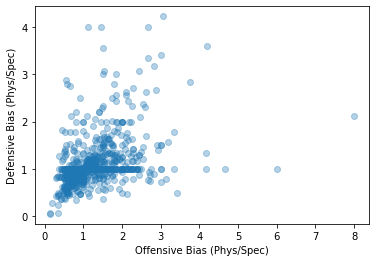

In [20]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

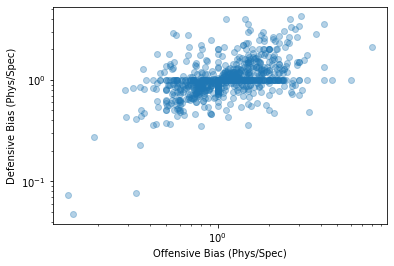

In [21]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log');

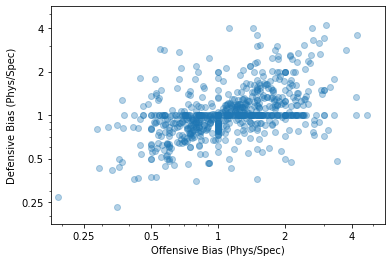

In [22]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5);